In [1]:
#Imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
from time import time
import gensim
import random
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [2]:
import pandas as pd

# Load data from CSV file into a DataFrame
df = pd.read_csv("C:\\Users\\jash\\Desktop\\Term2\\Reviews.csv")

# Display the first few rows of the DataFrame
print(df.head())


   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [3]:
#Filter rows where HelpfulnessDenominator is 0 and calculate the resulting DataFrame shape.
df[df.HelpfulnessDenominator == 0].shape


(270052, 10)

In [4]:
#Get information about the number of data points in the dataset
print("Number of datapoints: ",df.shape[0])
print("Number of features: ",df.shape[1])

Number of datapoints:  568454
Number of features:  10


In [5]:
# Define the number of reviews to extract from each rating class, to balance the classes, there is a strong imbalance in data. 
num_reviews_per_class = 29770

# Create empty list to store balanced data
balanced_data = []

# Iterate through each rating class
for score in range(1, 6):
    # Filter reviews for the current rating class
    reviews_for_score = df[df['Score'] == score]
    
    # Select a fixed number of reviews from the current rating class
    selected_reviews = reviews_for_score.head(num_reviews_per_class)
    
    # Append selected reviews to the balanced data list
    balanced_data.append(selected_reviews)

# Concatenate the balanced data DataFrames
balanced_data = pd.concat(balanced_data, ignore_index=True)

# Optional: Shuffle the balanced dataset
balanced_data = balanced_data.sample(frac=1).reset_index(drop=True)

# Display the balanced dataset
print("Balanced Dataset:")
print(balanced_data.head())
print("Number of data points in our data:", len(balanced_data))



Balanced Dataset:
       Id   ProductId          UserId                 ProfileName  \
0   88655  B000PMJLJO   AG7QPDO7GNT5B       Fake name real review   
1   23294  B00207UBMS  A28HJSJ46MVAXL               Alice "Alice"   
2  153938  B005VOOM2W  A1Z7Y2GMAP9SRY    M. Thompson "Dyson Diva"   
3  165537  B001QE7J2G  A1CEJADETM9F1U                country girl   
4   98849  B001FA19Z4   AFP6OOD8EDRSP  Mamazabakaka "Tome Raider"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     0                       0      4  1240012800   
1                     0                       0      5  1329004800   
2                     1                       6      1  1332201600   
3                     1                       2      2  1328832000   
4                     0                       1      1  1234569600   

                       Summary  \
0                  pretty good   
1  Brodies' teas are delicious   
2                    Weak brew   
3         

In [6]:
def partition(x):
    if x < 3:
        return 0
    return 1

#changing reviews with score less than 3 to be positive and vice-versa
actual_score = balanced_data['Score']
positiveNegative = actual_score.map(partition) 
balanced_data['Score'] = positiveNegative

print("Number of data points in our data:", balanced_data.shape)
print(balanced_data.head(3))

Number of data points in our data: (148849, 10)
       Id   ProductId          UserId               ProfileName  \
0   88655  B000PMJLJO   AG7QPDO7GNT5B     Fake name real review   
1   23294  B00207UBMS  A28HJSJ46MVAXL             Alice "Alice"   
2  153938  B005VOOM2W  A1Z7Y2GMAP9SRY  M. Thompson "Dyson Diva"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     0                       0      1  1240012800   
1                     0                       0      1  1329004800   
2                     1                       6      0  1332201600   

                       Summary  \
0                  pretty good   
1  Brodies' teas are delicious   
2                    Weak brew   

                                                Text  
0  These were pretty good but the 2 oz ones taste...  
1  We enjoy afternoon tea every day, and we are v...  
2  No instructions on packaging that I could find...  


In [7]:
print("Number of data points in our data:", len(balanced_data))


Number of data points in our data: 148849


In [8]:
# Filter the balanced_data DataFrame

#sorting data into positive and negative data 
display = balanced_data[(balanced_data['Score'] != 3) & (balanced_data['UserId'] == "AR5J8UI46CURR")]

# Sort the filtered DataFrame by ProductID
display = display.sort_values(by='ProductId')

# Display the first few rows of the filtered DataFrame
print(display.head())

Empty DataFrame
Columns: [Id, ProductId, UserId, ProfileName, HelpfulnessNumerator, HelpfulnessDenominator, Score, Time, Summary, Text]
Index: []


In [9]:
# Sorting data according to ProductId in ascending order
sorted_data = balanced_data.sort_values(by='ProductId', ascending=True)

# Displaying the first 5 rows of the sorted DataFrame
print(sorted_data.head(5))


            Id   ProductId          UserId            ProfileName  \
101095   24750  2734888454  A13ISQV0U9GZIC              Sandikaye   
115251   24751  2734888454  A1C298ITT645B6      Hugh G. Pritchard   
105436  150502     6641040   AVFMJ50HNO21J               Jane Doe   
96585   150522     6641040  A1S3C5OFU508P3      Charles Ashbacher   
105245  150507     6641040  A1S4A3IQ2MU7V4  sally sue "sally sue"   

        HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
101095                     1                       1      0  1192060800   
115251                     0                       0      1  1195948800   
105436                     1                       1      1  1324944000   
96585                      0                       0      1  1219536000   
105245                     1                       1      1  1191456000   

                                                  Summary  \
101095                                      made in china   
115251      

In [10]:
# Deduplication of entries
final = sorted_data.drop_duplicates(subset=["UserId", "ProfileName", "Time", "Text"], keep='first', inplace=False)

# Get the shape of the deduplicated DataFrame
print(final.shape)


(117061, 10)


In [11]:
# Filter the DataFrame to select rows where the Score is not equal to 3 and the Id is either 44737 or 64422
display = df[(df['Score'] != 3) & ((df['Id'] == 44737) | (df['Id'] == 64422))]

# Sort the filtered DataFrame by ProductID
display = display.sort_values(by='ProductId')

# Display the first few rows of the filtered DataFrame
display.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...


In [12]:
# Filter out rows where HelpfulnessNumerator is greater than HelpfulnessDenominator
final = final[final['HelpfulnessNumerator'] <= final['HelpfulnessDenominator']]
# Filter the balanced_data DataFrame for rows where 'Score' is equal to 1
score_1_reviews = balanced_data[balanced_data['Score'] == 3]

# Print the total number of reviews with score 1
total_score_1_reviews = len(score_1_reviews)
print("Total number of reviews with score 1:", total_score_1_reviews)

Total number of reviews with score 1: 0


In [19]:
import nltk
from nltk.tokenize import word_tokenize


# Preprocess text function
def preprocess_text(text):
    """Preprocess text by removing HTML tags, punctuation, special characters, and non-alphanumeric characters."""
    # Remove HTML tags
    clean_text = re.sub(r'<.*?>', '', text)
    # Remove punctuation, special characters, and non-alphanumeric characters
    clean_text = re.sub(r'[^\w\s]', '', clean_text)
    return clean_text

# Tokenization function
def tokenize_text(text):
    """Tokenize text using NLTK word_tokenize."""
    tokens = word_tokenize(text)
    return tokens

# Apply preprocessing and tokenization to the 'text' column
df['preprocessed_text'] = df['Text'].apply(preprocess_text)
df['tokens'] = df['preprocessed_text'].apply(tokenize_text)

# Display the DataFrame with preprocessed text and tokens
print(df[['Text', 'preprocessed_text', 'tokens']].head())


                                                Text  \
0  I have bought several of the Vitality canned d...   
1  Product arrived labeled as Jumbo Salted Peanut...   
2  This is a confection that has been around a fe...   
3  If you are looking for the secret ingredient i...   
4  Great taffy at a great price.  There was a wid...   

                                   preprocessed_text  \
0  I have bought several of the Vitality canned d...   
1  Product arrived labeled as Jumbo Salted Peanut...   
2  This is a confection that has been around a fe...   
3  If you are looking for the secret ingredient i...   
4  Great taffy at a great price  There was a wide...   

                                              tokens  
0  [I, have, bought, several, of, the, Vitality, ...  
1  [Product, arrived, labeled, as, Jumbo, Salted,...  
2  [This, is, a, confection, that, has, been, aro...  
3  [If, you, are, looking, for, the, secret, ingr...  
4  [Great, taffy, at, a, great, price, There, was..

In [23]:
import nltk
from nltk.corpus import stopwords

# Load English stopwords from NLTK
stop_words = set(stopwords.words('english'))
# Words to exclude from stopwords
excluding = {'against', 'not', 'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't",
             'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",
             'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shouldn', "shouldn't", 'wasn',
             "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"}

# Exclude specified words from stopwords
stop_words = stop_words - excluding


# Function to remove stop words from text
def remove_stopwords(text):
    """Remove stopwords from text."""
    tokens = text.split()  # Tokenize text into words
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]  # Filter out stopwords
    filtered_text = ' '.join(filtered_tokens)  # Join filtered tokens back into text
    return filtered_text

df['text_without_stopwords'] = df['Text'].apply(remove_stopwords)

# Display the DataFrame with text column and text without stopwords column
print(df[['Text', 'text_without_stopwords']].head())


                                                Text  \
0  I have bought several of the Vitality canned d...   
1  Product arrived labeled as Jumbo Salted Peanut...   
2  This is a confection that has been around a fe...   
3  If you are looking for the secret ingredient i...   
4  Great taffy at a great price.  There was a wid...   

                              text_without_stopwords  
0  bought several Vitality canned dog food produc...  
1  Product arrived labeled Jumbo Salted Peanuts.....  
2  confection around centuries. light, pillowy ci...  
3  looking secret ingredient Robitussin believe f...  
4  Great taffy great price. wide assortment yummy...  


In [22]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to perform lemmatization on text
def lemmatize_text(text):
    """Lemmatize text using NLTK WordNetLemmatizer."""
    tokens = nltk.word_tokenize(text)  # Tokenize text into words
    lemmatized_tokens = [lemmatizer.lemmatize(word, pos='v') for word in tokens]  # Lemmatize tokens (assumes verbs)
    lemmatized_text = ' '.join(lemmatized_tokens)  # Join lemmatized tokens back into text
    return lemmatized_text

# Assuming 'df' is your DataFrame containing the dataset and 'Text' is the column name
df['lemmatized_text'] = df['Text'].apply(lemmatize_text)

# Display the DataFrame with original text and lemmatized text
print(df[['Text', 'lemmatized_text']].head())


                                                Text  \
0  I have bought several of the Vitality canned d...   
1  Product arrived labeled as Jumbo Salted Peanut...   
2  This is a confection that has been around a fe...   
3  If you are looking for the secret ingredient i...   
4  Great taffy at a great price.  There was a wid...   

                                     lemmatized_text  
0  I have buy several of the Vitality can dog foo...  
1  Product arrive label as Jumbo Salted Peanuts ....  
2  This be a confection that have be around a few...  
3  If you be look for the secret ingredient in Ro...  
4  Great taffy at a great price . There be a wide...  


In [26]:
from sklearn.model_selection import train_test_split

# Split the balanced_data into features (X) and target variable (y)
X = balanced_data['Text']  # Features
y = balanced_data['Score']  # Target variable

# Step 1: Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (119079,)
Shape of X_test: (29770,)
Shape of y_train: (119079,)
Shape of y_test: (29770,)


In [27]:
#performing tf_idf on training dataset
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed training text data to create the TF-IDF representation
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Display the shape of the TF-IDF matrix
print("Shape of X_train_tfidf:", X_train_tfidf.shape)


Shape of X_train_tfidf: (119079, 60777)


In [29]:
# building svm model based on training dataset
from sklearn.svm import LinearSVC

# Initialize the LinearSVC model
svm_model = LinearSVC()

# Train the SVM model on the TF-IDF vectorized training data
svm_model.fit(X_train_tfidf, y_train)


print(svm_model.coef_)  # Print the coefficients of the model
print(svm_model.intercept_)  # Print the intercept of the model


[[-0.61788373  0.46348192 -0.03036742 ...  0.17382629  0.
   0.        ]]
[0.13349783]


In [30]:
# Transform the preprocessed testing text data to TF-IDF representation
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Use the trained SVM model to make predictions on the TF-IDF vectorized testing data
y_pred = svm_model.predict(X_test_tfidf)


print(y_pred)  # Print the predicted labels


[1 0 0 ... 1 0 1]


In [31]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)


In [32]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.81      0.79      0.80     11888
           1       0.86      0.88      0.87     17882

    accuracy                           0.84     29770
   macro avg       0.84      0.83      0.84     29770
weighted avg       0.84      0.84      0.84     29770



In [33]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)


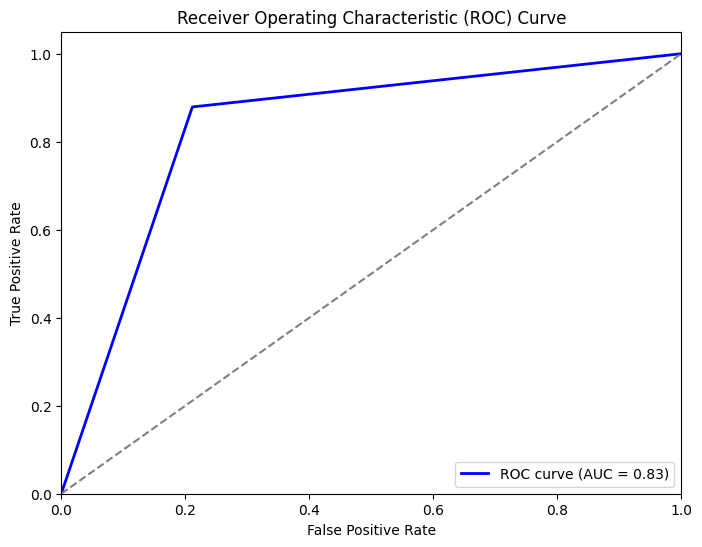

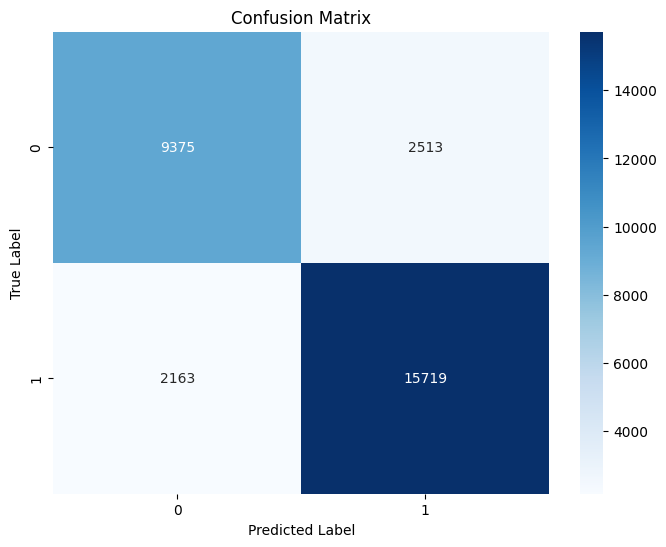

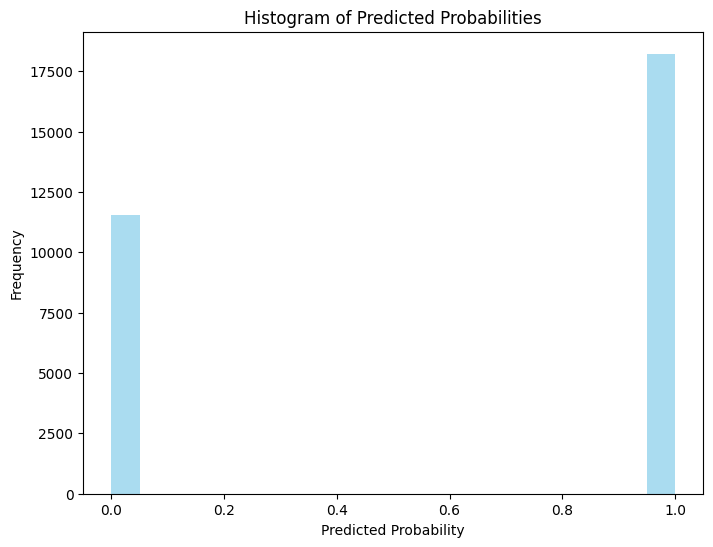

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot histogram of predicted probabilities
plt.figure(figsize=(8, 6))
plt.hist(y_pred, bins=20, color='skyblue', alpha=0.7)
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()


In [36]:
pip install lime

     ------------------------------------ 275.7/275.7 kB 653.9 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 12.1/12.1 MB 955.5 kB/s eta 0:00:00
     ---------------------------------------- 1.9/1.9 MB 1.5 MB/s eta 0:00:00
     -------------------------------------- 313.2/313.2 kB 1.4 MB/s eta 0:00:00
     -------------------------------------- 178.9/178.9 kB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 4.2/4.2 MB 1.0 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283846 sha256=5153c7e0b4297831af5ff108e9517418193d9f16dc30706e1cd4bfef427eb616
  Stored in directory: c:\users\jash\appdata\local\pip\cache\wheels\ca\cb\e5\ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


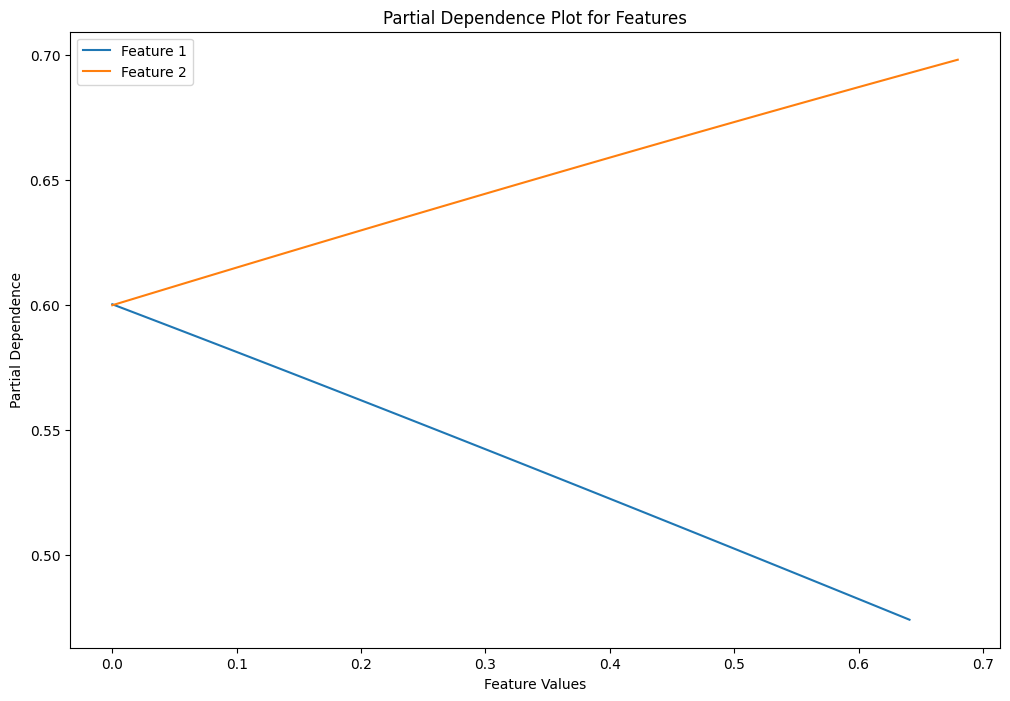

In [45]:
from sklearn.calibration import CalibratedClassifierCV

# Fit a calibrated classifier to the LinearSVC model
calibrated_svc = CalibratedClassifierCV(svm_model, method='sigmoid')
calibrated_svc.fit(X_train_tfidf, y_train)

# Compute partial dependence for the first feature
feature_values1, partial_dependence_values1 = compute_partial_dependence(calibrated_svc, X_train_tfidf, feature_idx1)

# Compute partial dependence for the second feature
feature_values2, partial_dependence_values2 = compute_partial_dependence(calibrated_svc, X_train_tfidf, feature_idx2)

# Plot Partial Dependence Plots
plt.figure(figsize=(12, 8))

# Plot for the first feature
plt.plot(feature_values1, partial_dependence_values1, label='Feature 1')

# Plot for the second feature
plt.plot(feature_values2, partial_dependence_values2, label='Feature 2')

plt.title('Partial Dependence Plot for Features')
plt.xlabel('Feature Values')
plt.ylabel('Partial Dependence')
plt.legend()
plt.show()

